In [7]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [8]:
# Create a set of random latitude and longitude combinations.
# zip() will pair the long and lat
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-7.79264695557778, 138.28403497599692),
 (80.38879202787678, -32.79836481144366),
 (18.397794627413475, -66.67729357927197),
 (-72.18527209672435, -70.83612771713258),
 (74.32831324414732, -85.15205960423356),
 (-27.88008460418451, -141.04466792863178),
 (57.09881930145531, -40.10536888591261),
 (22.802266626999625, -55.8717877778776),
 (82.4660941365012, -130.096664767044),
 (-64.88608390082025, 145.8432626239616),
 (27.756510140242526, 0.05559759619836768),
 (24.658989273316593, 53.73467878633775),
 (48.83014949599294, 31.246771574866727),
 (-79.20745232814767, 56.0999632658515),
 (-48.96611973987234, 163.347112380643),
 (-33.140687532889864, -47.548411384858014),
 (15.254503461586154, -80.40441245273857),
 (1.2874751932339024, 39.861605221481824),
 (51.36683998213141, -61.59413283619476),
 (15.051358260086218, -154.45337283059428),
 (-42.686519000437016, -170.39769781629815),
 (39.338454515207815, 148.12540507729312),
 (-3.0212672799918607, 98.4312808530438),
 (-66.26662048236545,

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [12]:
from citipy import citipy
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3bc86c238c73c15466acb4ac8624ab4d


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | merauke
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | arecibo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | adrar
Processing Record 12 of Set 1 | abu dhabi
Processing Record 13 of Set 1 | yurkivka
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | iralaya
Processing Record 18 of Set 1 | wajir
Processing Record 19 of Set 1 | havre-saint-pierre
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | nemuro
Processing R

Processing Record 38 of Set 4 | comodoro rivadavia
Processing Record 39 of Set 4 | makakilo city
Processing Record 40 of Set 4 | butembo
Processing Record 41 of Set 4 | mahon
Processing Record 42 of Set 4 | ponta delgada
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | san quintin
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | labuhan
Processing Record 47 of Set 4 | lethem
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | tazovskiy
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | rapar
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | viedma
Processing Record 8 of Set 5 | alofi
Processing Record 9 of Set 5 | narsaq
Processing Record 10 of Set 5 | vikulovo
Processing Record 11 of Set 5 | palmer

Processing Record 27 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 28 of Set 8 | asau
Processing Record 29 of Set 8 | huangchuan
Processing Record 30 of Set 8 | santa isabel do rio negro
Processing Record 31 of Set 8 | aklavik
Processing Record 32 of Set 8 | zyryanka
Processing Record 33 of Set 8 | przhevalskoye
Processing Record 34 of Set 8 | port keats
Processing Record 35 of Set 8 | hamilton
Processing Record 36 of Set 8 | katherine
Processing Record 37 of Set 8 | ganzhou
Processing Record 38 of Set 8 | talah
City not found. Skipping...
Processing Record 39 of Set 8 | warman
Processing Record 40 of Set 8 | qaqortoq
Processing Record 41 of Set 8 | ondjiva
Processing Record 42 of Set 8 | yatou
Processing Record 43 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 44 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 45 of Set 8 | brae
Processing Record 46 of Set 8 | teknaf
Processing Record 47 of Set 8 | hentie

Processing Record 11 of Set 12 | whitehorse
Processing Record 12 of Set 12 | bustamante
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | bubaque
Processing Record 15 of Set 12 | gautier
Processing Record 16 of Set 12 | alyangula
Processing Record 17 of Set 12 | marilia
Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | coquimbo
Processing Record 20 of Set 12 | taksimo
Processing Record 21 of Set 12 | farafangana
Processing Record 22 of Set 12 | namatanai
Processing Record 23 of Set 12 | bayeux
Processing Record 24 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 25 of Set 12 | natal
Processing Record 26 of Set 12 | sharan
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | saint-augustin
Processing Record 29 of Set 12 | gangotri
City not found. Skipping...
Processing Record 30 of Set 12 | westport
Processing Record 31 of Set 12 | porto novo
Processing Record 32 of Set 12 | newport
Processing Record 33 o

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Merauke,-8.47,140.33,78.03,87,22,11.83,ID,2020-10-23 18:25:08
1,Arecibo,18.47,-66.72,93.00,74,13,3.00,PR,2020-10-23 18:26:42
2,Ushuaia,-54.80,-68.30,50.00,57,40,5.82,AR,2020-10-23 18:28:02
3,Qaanaaq,77.48,-69.36,19.96,93,100,9.28,GL,2020-10-23 18:28:02
4,Rikitea,-23.12,-134.97,73.85,78,46,6.38,PF,2020-10-23 18:28:03
5,Nanortalik,60.14,-45.24,35.19,83,100,3.22,GL,2020-10-23 18:28:03
6,Codrington,-38.27,141.97,50.32,84,100,13.11,AU,2020-10-23 18:28:03
7,Tuktoyaktuk,69.45,-133.04,21.20,92,75,10.29,CA,2020-10-23 18:28:03
8,Hobart,-42.88,147.33,53.01,93,90,3.49,AU,2020-10-23 18:28:04
9,Adrar,20.50,-10.07,93.02,12,20,1.19,MR,2020-10-23 18:28:04


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity",
                   "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Merauke,ID,2020-10-23 18:25:08,-8.47,140.33,78.03,87,22,11.83
1,Arecibo,PR,2020-10-23 18:26:42,18.47,-66.72,93.00,74,13,3.00
2,Ushuaia,AR,2020-10-23 18:28:02,-54.80,-68.30,50.00,57,40,5.82
3,Qaanaaq,GL,2020-10-23 18:28:02,77.48,-69.36,19.96,93,100,9.28
4,Rikitea,PF,2020-10-23 18:28:03,-23.12,-134.97,73.85,78,46,6.38
...,...,...,...,...,...,...,...,...,...
544,Tessalit,ML,2020-10-23 18:30:37,20.20,1.01,89.80,12,0,11.95
545,Jijiga,ET,2020-10-23 18:30:37,9.35,42.80,67.35,45,73,11.68
546,Abu Samrah,SY,2020-10-23 18:30:37,35.30,37.18,70.56,23,0,6.73
547,Sokolo,ML,2020-10-23 18:30:38,14.73,-6.12,90.57,14,0,3.94


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603479438.061688

In [25]:
today = time.strftime("%x")
today

'10/23/20'

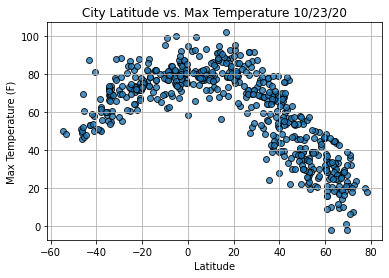

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

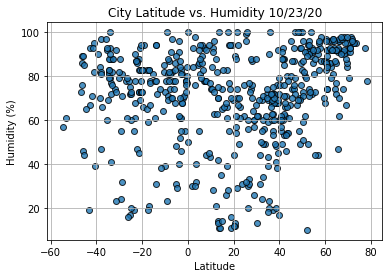

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

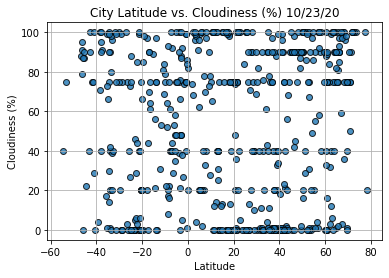

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

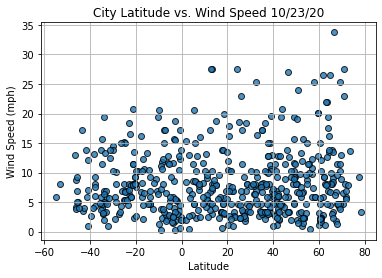

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
